# OVERVIEW



Algarve resort and Lisbon City Hotel are 2 hotels located in Portugal. The two hotels wish to find out the most popular time of year that hotel rooms are booked, so they can adequately plan themselves in terms of supplies and staffing. This will ensure that they are able to cater to their guests more efficiently.





# IMPORTING LIBRARIES

In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING DATASET 

In [2]:
# Loading the datasets
names = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']
hotel_df = pd.read_csv('hotel_bookings.csv', usecols=names)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


# CHECKING THE DATA

In [3]:
# Determing the number of records in our dataset
hotel_df.shape

(36553, 32)

In [4]:
# Previewing the first records of our dataset
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [5]:
# Previewing the last records of our dataset
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
36548,Resort Hotel,0,68,2017,May,20,17,2,5,2,0,0,BB,BEL,Direct,Direct,0,0,0,F,F,0,No Deposit,250.0,NaN,0.0,Group,120.0,0.0,2.0,Check-Out,2017-05-24
36549,Resort Hotel,0,0,2017,May,21,23,0,1,1,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,85.0,0.0,0.0,Check-Out,2017-05-24
36550,Resort Hotel,0,2,2017,May,21,24,0,1,1,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,8.0,NaN,0.0,Group,42.0,0.0,0.0,Check-Out,2017-05-25
36551,Resort Hotel,0,8,2017,May,21,23,0,1,1,0,0,BB,USA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,241.0,NaN,0.0,Transient,72.0,0.0,1.0,Check-Out,2017-05-24
36552,Resort Hotel,0,1,2017,May,21,24,0,1,1,0,0,BB,USA,Direct,Direct,0,0,0,A,E,0,No Depos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#consice summary of train dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36553 entries, 0 to 36552
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           36553 non-null  object 
 1   is_canceled                     36553 non-null  int64  
 2   lead_time                       36553 non-null  int64  
 3   arrival_date_year               36553 non-null  int64  
 4   arrival_date_month              36553 non-null  object 
 5   arrival_date_week_number        36553 non-null  int64  
 6   arrival_date_day_of_month       36553 non-null  int64  
 7   stays_in_weekend_nights         36553 non-null  int64  
 8   stays_in_week_nights            36553 non-null  int64  
 9   adults                          36553 non-null  int64  
 10  children                        36553 non-null  int64  
 11  babies                          36553 non-null  int64  
 12  meal                            

**observation**: our datset has 119390 observations and 32 variables, it has 4 floats, 16int and 12 object datatype.

In [7]:
# checking the target variable
hotel_df.is_canceled.value_counts() 

0    25432
1    11121
Name: is_canceled, dtype: int64

In [8]:
#getting the above in parcentage
#
hotel_df.is_canceled.value_counts() / len(hotel_df) * 100 

0    69.575685
1    30.424315
Name: is_canceled, dtype: float64

Tidying the data




In [9]:
#creating a copy of the dataset to be be used on cleaning process
hotel_df1=hotel_df.copy()
#
#getting the irrelevant varaibles
columns = ['arrival_date_year','agent','arrival_date_week_number','lead_time', 'market_segment', 'distribution_channel','booking_changes','days_in_waiting_list', 'adr','reservation_status_date']
#
#dropping the irrelevant colunms
drop_colunms= hotel_df1.drop(columns, axis = 1, inplace=True)
#
#previewing the dataset
hotel_df1.head()

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,company,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,July,1,0,0,2,0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,Transient,0.0,0.0,Check-Out
1,Resort Hotel,0,July,1,0,0,2,0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,Transient,0.0,0.0,Check-Out
2,Resort Hotel,0,July,1,0,1,1,0,0,BB,GBR,0,0,0,A,C,No Deposit,NaN,Transient,0.0,0.0,Check-Out
3,Resort Hotel,0,July,1,0,1,1,0,0,BB,GBR,0,0,0,A,A,No Deposit,NaN,Transient,0.0,0.0,Check-Out
4,Resort Hotel,0,July,1,0,2,2,0,0,BB,GBR,0,0,0,A,A,No Deposit,NaN,Transient,0.0,1.0,Check-Out


In [10]:
# Check for missing values
#
hotel_df1.isnull().sum()

hotel                                 0
is_canceled                           0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             464
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
deposit_type                          0
company                           33550
customer_type                         1
required_car_parking_spaces           1
total_of_special_requests             1
reservation_status                    1
dtype: int64

In [11]:
#getting the percentage of missing data in each column
#
hotel_df1.isnull().sum()/len(hotel_df1)* 100 



hotel                              0.000000
is_canceled                        0.000000
arrival_date_month                 0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            1.269390
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
deposit_type                       0.000000
company                           91.784532
customer_type                      0.002736
required_car_parking_spaces        0.002736
total_of_special_requests          0.002736
reservation_status                 0.002736
dtype: float64

In [12]:
# as a role of thumb, drop any colunm with more than 25% of the missing data.
#
hotel_df1 = hotel_df1[hotel_df1.columns[hotel_df1.isnull().mean() < 0.25]]
hotel_df1.shape

(36553, 21)

In [13]:
hotel_df1.isnull().sum()

hotel                               0
is_canceled                         0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           464
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
deposit_type                        0
customer_type                       1
required_car_parking_spaces         1
total_of_special_requests           1
reservation_status                  1
dtype: int64

**observation**: the data type are appropriate now and there is a clue that we have null values.

In [14]:
#filling the missing values of children variable with the mean
#
hotel_df1['children']= hotel_df1['children'].fillna(hotel_df1['children'].mean(), axis = 0)

In [15]:
#filling the missing values in the country variable with mode
#
hotel_df1.fillna({'country': hotel_df1['country'].mode()[0]}, inplace=True)

In [16]:
hotel_df1.columns

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [17]:
#confriming no missing values.
#
hotel_df1.isnull().sum().any()

True

In [18]:
# Checking if there are duplicates
#
hotel_df1.duplicated().sum()

8209

In [19]:
# Dropping duplicates
hotel_df1.drop_duplicates(inplace=True)
#
#confirm no duplicates
#
hotel_df1.duplicated().any()

False

In [20]:
#To remove white spaces in our columns
hotel_df1.columns.str.replace(" "," ")

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

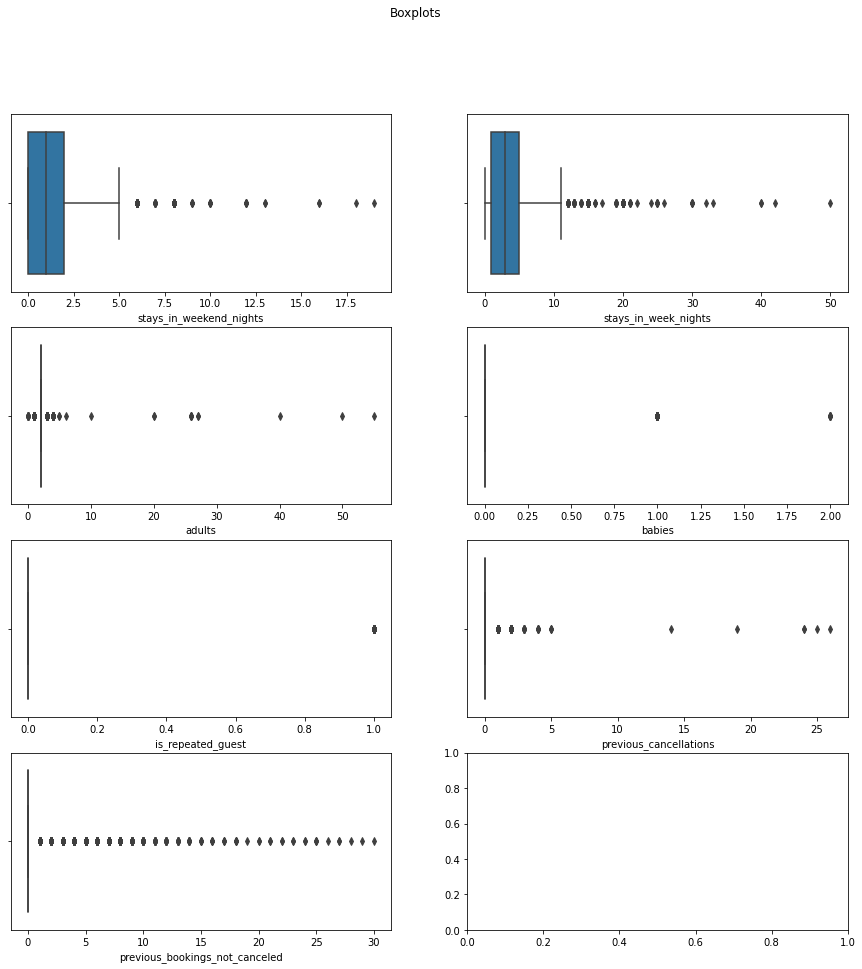

In [21]:
# To check for outliers through boxplots
#

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(15, 15))

fig.suptitle('Boxplots')
sns.boxplot(hotel_df1['stays_in_weekend_nights'], ax=ax1)
sns.boxplot(hotel_df1['stays_in_week_nights'], ax=ax2)
sns.boxplot(hotel_df1['adults'], ax=ax3)
sns.boxplot(hotel_df1['babies'], ax=ax4)
sns.boxplot(hotel_df1['is_repeated_guest'], ax=ax5)
sns.boxplot(hotel_df1['previous_cancellations'], ax=ax6)
sns.boxplot(hotel_df1['previous_bookings_not_canceled'], ax=ax7)
plt.show()

In [22]:
# Check for outliers through IQR Score

# we first get the interquantile range for each column
Q1 = hotel_df1.quantile(0.25)
Q3 = hotel_df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                        1.0
arrival_date_day_of_month         16.0
stays_in_weekend_nights            2.0
stays_in_week_nights               4.0
adults                             0.0
children                           0.0
babies                             0.0
is_repeated_guest                  0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
required_car_parking_spaces        0.0
total_of_special_requests          1.0
dtype: float64


In [23]:
# We then get the outliers as follows:
# True means presence of outliers

(hotel_df1 < (Q1 - 1.5 * IQR)) |(hotel_df1 > (Q3 + 1.5 * IQR))

,adults,arrival_date_day_of_month,arrival_date_month,assigned_room_type,babies,children,country,customer_type,deposit_type,hotel,is_canceled,is_repeated_guest,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36549,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36550,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36551,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
# We then filter out outliers and remain with valid values as follows

df_clean = hotel_df1[~((hotel_df1 < (Q1 - 1.5 * IQR)) |(hotel_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape

(14936, 21)

**observation**: clean dataset has 43962 records and 21 variables.

In [25]:
#converting the data to the correct datatype- float
#
df_clean[["is_canceled", "arrival_date_day_of_month", "stays_in_weekend_nights", "adults", "adults", "previous_cancellations","previous_cancellations", "previous_bookings_not_canceled","required_car_parking_spaces", "total_of_special_requests" ]] = df_clean[["is_canceled", "arrival_date_day_of_month", "stays_in_weekend_nights", "adults", "adults", "previous_cancellations","previous_cancellations", "previous_bookings_not_canceled","required_car_parking_spaces", "total_of_special_requests"]].astype(float)
#

#converting categorical variables to the correct datatype-category
#
df_clean[["hotel","arrival_date_month","meal", "country", "reserved_room_type","assigned_room_type", "deposit_type", "customer_type", "reservation_status" ]] = df_clean[["hotel","arrival_date_month","meal", "country", "reserved_room_type","assigned_room_type", "deposit_type", "customer_type", "reservation_status"]].astype('category')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14936 entries, 0 to 36548
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           14936 non-null  category
 1   is_canceled                     14936 non-null  float64 
 2   arrival_date_month              14936 non-null  category
 3   arrival_date_day_of_month       14936 non-null  float64 
 4   stays_in_weekend_nights         14936 non-null  float64 
 5   stays_in_week_nights            14936 non-null  int64   
 6   adults                          14936 non-null  float64 
 7   children                        14936 non-null  int64   
 8   babies                          14936 non-null  int64   
 9   meal                            14936 non-null  category
 10  country                         14936 non-null  category
 11  is_repeated_guest               14936 non-null  int64   
 12  previous_cancellat

##6. Exploratory Data Analysis

## 6a. Univariate analysis

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.






In [27]:
# preview of our dataset
#
df_clean.head()

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0.0,July,1.0,0.0,0,2.0,0,0,BB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,0.0,Check-Out
4,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0,0,BB,GBR,0,0.0,0.0,A,A,No Deposit,Transient,0.0,1.0,Check-Out
6,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0,0,BB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,0.0,Check-Out
7,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0,0,FB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,1.0,Check-Out
8,Resort Hotel,1.0,July,1.0,0.0,3,2.0,0,0,BB,PRT,0,0.0,0.0,A,A,No Deposit,Transient,0.0,1.0,Canceled


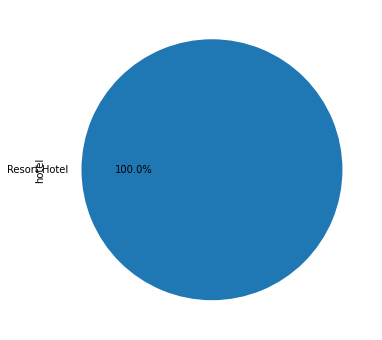

In [28]:
#univariate analysis: hotel variable piechart
#
plt.figure(figsize = (6, 6))
df_clean.hotel.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

**observation**: city hotel registered a higher reservation of 63.7%

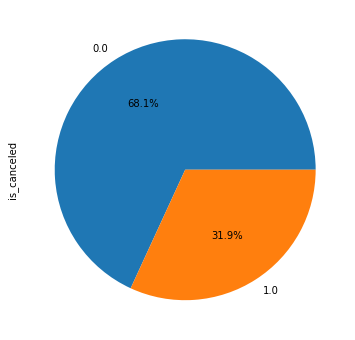

In [29]:
#univariate analysis: is cancelled variable piechart
#
plt.figure(figsize = (6, 6))
df_clean.is_canceled.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

#0=> not cancelled
#1=> cancelled

**observation**: only 31% of reversation was cancelled.

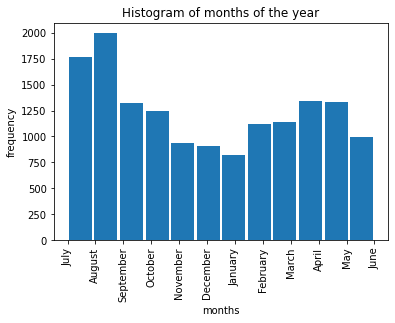

In [30]:
# univariate analysis: month of arrival variable histogram
#
plt.hist(df_clean['arrival_date_month'], bins=12, histtype='bar', rwidth=0.9)
plt.xticks(rotation=90)
plt.xlabel('months')
plt.ylabel('frequency')
plt.title('Histogram of months of the year') 
plt.show()

**observation**: The most popular months of travel were between May and August with the peak being recorded at August.

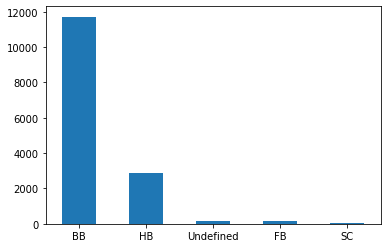

In [31]:
# univariate analysis: meal variable bar graph
df_clean.meal.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**: many guests went for bed and breakfast option.

In [32]:
# univariate analysis: month of arrival frequency count
# 
df_clean.country.value_counts(ascending=False) 

PRT    5485
GBR    3075
ESP    1636
IRL    1141
FRA     668
       ... 
EGY       1
CRI       1
CUB       1
CYM       1
MDG       1
Name: country, Length: 104, dtype: int64

**observation**: Most of the hotel guests came from Portugal and Great Britain.

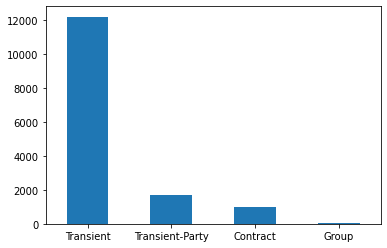

In [33]:
# univariate analysis: customer type variable bar graph
df_clean.customer_type.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**:The most frequent type of guest was the transient.

**observation**: Most popular arrival dates for customers is 17th and  2nd early of the month mostly because that's when people get their salaries

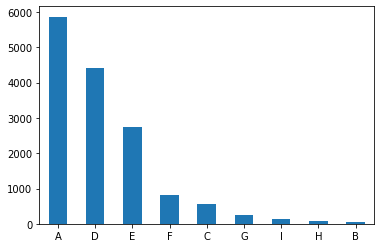

In [34]:
# univariate analysis: room type variable bar graph
df_clean.assigned_room_type.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**: most of the clients went for romm type A

## Observations from Univariate Analysis
1. Guests preferred the city hotels to the resort hotels
2. Most guests went for the Bed and Break fast option while the Full board option had the least customers
3.Most of the hotel guests came from Portugal and Great Britain while very few came from Germany
4.The most frequent type of guest was the transient type who came for a short term visit while the group type of guests were the least
5.The most popular months of travel were between May and August with the peak being recorded at July mainly because it is summer in Europe during these months
6.Most popular arrival dates for customers is during end month mostly because that's when people get their salaries 
7.The most popular room type both for bookings and reservations is Type A while the least popular L

# Bivariate Analysis 

### Bar Charts to show the relationship between booking cancellation status and other variables

In [35]:
df_clean['is_canceled'].value_counts()

# 0 = not canceled
# 1 = canceled

0.0    10177
1.0     4759
Name: is_canceled, dtype: int64

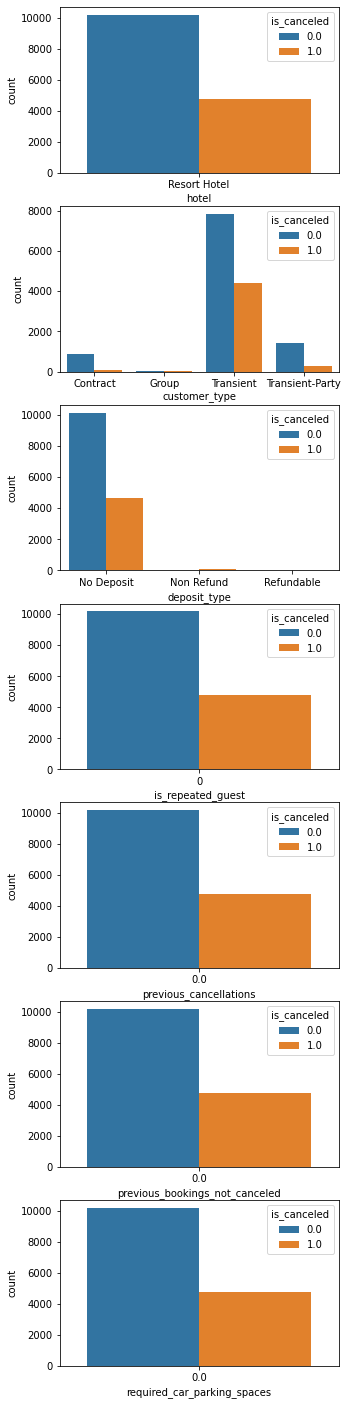

In [36]:
#plotting the target variable against other features.
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

f, axes = plt.subplots(7, 1, figsize=[5, 25])

sns.countplot('hotel', hue= 'is_canceled', data=df_clean, ax=axes[0])
sns.countplot('customer_type', hue= 'is_canceled', data=df_clean, ax=axes[1])
sns.countplot('deposit_type', hue= 'is_canceled', data=df_clean, ax=axes[2])
sns.countplot('is_repeated_guest', hue= 'is_canceled', data=df_clean, ax=axes[3])
sns.countplot('previous_cancellations', hue= 'is_canceled', data=df_clean, ax=axes[4])
sns.countplot('previous_bookings_not_canceled', hue= 'is_canceled', data=df_clean, ax=axes[5])
sns.countplot('required_car_parking_spaces', hue= 'is_canceled', data=df_clean, ax=axes[6])

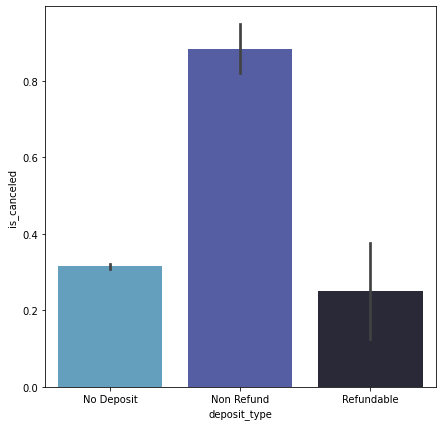

In [37]:
#Distribution of cancellation and Deposit Type¶

plt.figure(figsize=(7,7))
sns.barplot(x=df_clean['deposit_type'], y=df_clean['is_canceled'], palette=sns.color_palette("icefire"))

#It Seems more bookings were non refundable and were cancelled more as well

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Reservation_status'),
 Text(0.5, 1.0, 'Guest without special requests')]

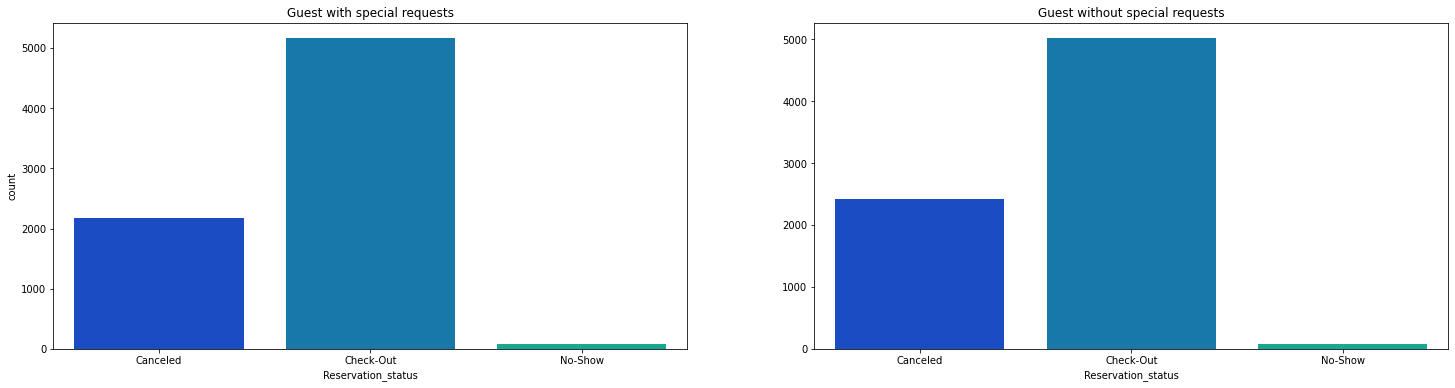

In [38]:
# Special and non Special Request of the guest
fig, ax = plt.subplots(1, 2, figsize=[25, 6])

special = df_clean[df_clean.total_of_special_requests != 0]
non_special = df_clean[df_clean.total_of_special_requests == 0]
special

# Plots
spec = sns.countplot(special.reservation_status, ax = ax[0], palette = 'winter')
spec.set(title = 'Guest with special requests', xlabel = 'Reservation_status')

n_spec = sns.countplot(non_special.reservation_status, ax = ax[1], palette = 'winter')
n_spec.set(title = 'Guest without special requests', ylabel = "", xlabel = 'Reservation_status')

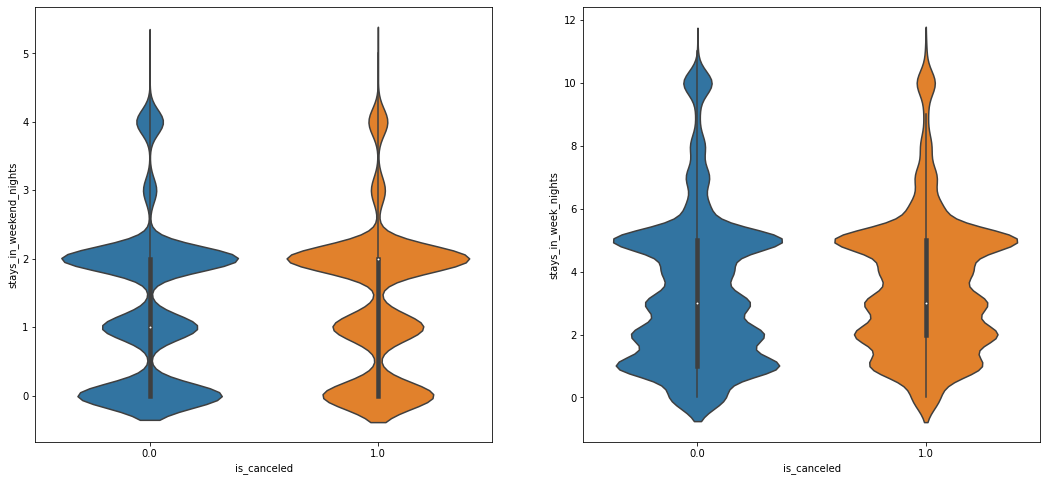

In [39]:
#Stays in weekend Nights and Week Nights for Cancelled and non cancelled bookings

fig, ax = plt.subplots(1, 2, figsize=[18, 8])

sns.violinplot( x=df_clean["is_canceled"], y=df_clean["stays_in_weekend_nights"], ax = ax[0] )
sns.violinplot( x=df_clean["is_canceled"], y=df_clean["stays_in_week_nights"], ax = ax[1] )

In [40]:
#sns.pairplot(df_clean,kind="scatter", diag_kind="kde", hue="is_canceled")

In [41]:
# Computing the correlation matrix 
#
# This is the association between numerical variables in the dataset
#

## Observations from the Bivariate Analysis
1. We see that it is more likely for customers from the city hotel to cancel their booking than the ones from the resort hotel

2. For customer type, the transient customers were most likely to cancel while groups cancelled least

3. We also saw that the guests who put no deposit were very likely to cancel because they had nothing to lose while the ones who put a refundable deposit didn't cancel at all 

4. The bivariate analysis also shows that it was by far less likely for repeated guests to cancel compared to their new counterparts


In [42]:
df_clean2=df_clean.copy()


In [43]:
# Label encoding to change our categorical variables to numerical to be able to create our correlation matrix

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df_clean['hotel'] = en.fit_transform(df_clean['hotel'])
df_clean['arrival_date_month'] = en.fit_transform(df_clean['arrival_date_month'])
df_clean['country'] = en.fit_transform(df_clean['country'])
df_clean['meal'] = en.fit_transform(df_clean['meal'])
df_clean['reserved_room_type'] = en.fit_transform(df_clean['reserved_room_type'])
df_clean['assigned_room_type'] = en.fit_transform(df_clean['assigned_room_type'])
df_clean['deposit_type'] = en.fit_transform(df_clean['deposit_type'])
df_clean['customer_type'] = en.fit_transform(df_clean['customer_type'])
df_clean['reservation_status'] = en.fit_transform(df_clean['reservation_status'])
df_clean

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,0.0,5,1.0,0.0,0,2.0,0,0,0,80,0,0.0,0.0,2,2,0,2,0.0,0.0,1
4,0,0.0,5,1.0,0.0,2,2.0,0,0,0,39,0,0.0,0.0,0,0,0,2,0.0,1.0,1
6,0,0.0,5,1.0,0.0,2,2.0,0,0,0,80,0,0.0,0.0,2,2,0,2,0.0,0.0,1
7,0,0.0,5,1.0,0.0,2,2.0,0,0,1,80,0,0.0,0.0,2,2,0,2,0.0,1.0,1
8,0,1.0,5,1.0,0.0,3,2.0,0,0,0,80,0,0.0,0.0,0,0,0,2,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36538,0,0.0,8,17.0,2.0,5,2.0,0,0,0,39,0,0.0,0.0,3,3,0,2,0.0,0.0,1
36539,0,0.0,8,17.0,2.0,5,2.0,0,0,0,39,0,0.0,0.0,3,3,0,2,0.0,1.0,1
36541,0,0.0,8,17.0,2.0,5,2.0,0,0,0,39,0,0.0,0.0,0,0,0,2,0.0,0.0,1
36546,0,0.0,8,23.0,0.0,1,2.0,0,0,0,98,0,0.0,0.0,3,3,0,2,0.0,1.0,1


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Splitting data into Input and Target Variable

y = df_clean[['is_canceled']]  # target variable 
X = df_clean.drop(['is_canceled'], axis=1)  # input variables

In [46]:
# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [47]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
#creating model. creat regressor object and train it using train data
#
# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state = 1)      
lr_baseline_model = clf_lr.fit(X_train,y_train)

In [49]:
# Noting down accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = lr_baseline_model.predict(X_test)

# Calculating the accuracy and F1 Score by comparing the actual and predicted values
ac = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test ,y_pred)

print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", f_score)

Baseline Model Accuracy: 0.9879518072289156
Baseline Model F1 Score: 0.9815950920245399


In [50]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= clf_lr , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False  True False  True  True False False False  True  True False False
 False  True  True  True False False  True  True]
Feature Ranking: [11  1  3  1  1  9  7  6  1  1 10  8  5  1  1  1  2  4  1  1]


In [51]:
X.info()#0,1,4,8,9,13,14,15,18,19

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14936 entries, 0 to 36548
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           14936 non-null  int64  
 1   arrival_date_month              14936 non-null  int64  
 2   arrival_date_day_of_month       14936 non-null  float64
 3   stays_in_weekend_nights         14936 non-null  float64
 4   stays_in_week_nights            14936 non-null  int64  
 5   adults                          14936 non-null  float64
 6   children                        14936 non-null  int64  
 7   babies                          14936 non-null  int64  
 8   meal                            14936 non-null  int64  
 9   country                         14936 non-null  int64  
 10  is_repeated_guest               14936 non-null  int64  
 11  previous_cancellations          14936 non-null  float64
 12  previous_bookings_not_canceled  

In [52]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.iloc[:, 0:]),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')


,Feature,Ranking
9,country,1
15,deposit_type,1
14,assigned_room_type,1
13,reserved_room_type,1
18,total_of_special_requests,1
8,meal,1
19,reservation_status,1
4,stays_in_week_nights,1
3,stays_in_weekend_nights,1
1,arrival_date_month,1


In [53]:
df2 = df_clean[['hotel', 'deposit_type','assigned_room_type','reserved_room_type','total_of_special_requests','meal','country','stays_in_week_nights','arrival_date_month','reservation_status']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14936 entries, 0 to 36548
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel                      14936 non-null  int64  
 1   deposit_type               14936 non-null  int64  
 2   assigned_room_type         14936 non-null  int64  
 3   reserved_room_type         14936 non-null  int64  
 4   total_of_special_requests  14936 non-null  float64
 5   meal                       14936 non-null  int64  
 6   country                    14936 non-null  int64  
 7   stays_in_week_nights       14936 non-null  int64  
 8   arrival_date_month         14936 non-null  int64  
 9   reservation_status         14936 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.9 MB


In [54]:
df2.columns

Index(['hotel', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
       'total_of_special_requests', 'meal', 'country', 'stays_in_week_nights',
       'arrival_date_month', 'reservation_status'],
      dtype='object')

In [55]:
df_clean2=df_clean2[['hotel', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
       'total_of_special_requests', 'meal', 'country', 'stays_in_week_nights',
       'arrival_date_month', 'reservation_status']]
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14936 entries, 0 to 36548
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   hotel                      14936 non-null  category
 1   deposit_type               14936 non-null  category
 2   assigned_room_type         14936 non-null  category
 3   reserved_room_type         14936 non-null  category
 4   total_of_special_requests  14936 non-null  float64 
 5   meal                       14936 non-null  category
 6   country                    14936 non-null  category
 7   stays_in_week_nights       14936 non-null  int64   
 8   arrival_date_month         14936 non-null  category
 9   reservation_status         14936 non-null  category
dtypes: category(8), float64(1), int64(1)
memory usage: 1.1 MB


In [56]:
df_clean2_copy = df_clean2.copy()

so we are going the following algorithms:


1. Logistic Reg
2. Random Forest
2. Gradient Boosted Trees
4. Naive Bayes Classifier
5. Neural Networks
6. k-NN classifier
7. SVM




k-NN classifier

In [57]:
#creating dummies for the categorical columns
columns = df_clean2.columns
df_clean2 = pd.get_dummies(df_clean2, columns=columns, drop_first=True)
df_clean2.head()

,deposit_type_Non Refund,deposit_type_Refundable,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,total_of_special_requests_1.0,total_of_special_requests_2.0,meal_FB,meal_HB,meal_SC,meal_Undefined,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_AUS,country_AUT,country_BDI,country_BEL,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BRA,country_CAF,...,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_THA,country_TUN,country_TUR,country_UKR,country_URY,country_USA,country_UZB,country_VEN,country_VNM,country_ZAF,country_ZWE,stays_in_week_nights_1,stays_in_week_nights_2,stays_in_week_nights_3,stays_in_week_nights_4,stays_in_week_nights_5,stays_in_week_nights_6,stays_in_week_nights_7,stays_in_week_nights_8,stays_in_week_nights_9,stays_in_week_nights_10,stays_in_week_nights_11,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,reservation_status_Check-Out,reservation_status_No-Show
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [58]:
##Defining our dependent and Independent Variables

y = df_clean[['is_canceled']]
X = df_clean2

In [59]:
# Implementing the Solution
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [60]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [61]:
# Using the 80-20 to train and test the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape


((11948, 151), (11948, 1))

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()

In [63]:
#Training the model.
model1 = model1.fit(X_train, y_train)

In [64]:
#Predict test data set.
y_pred = model1.predict(X_test)

In [65]:
#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1948  117]
 [ 246  677]]


In [66]:
#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      2065
         1.0       0.85      0.73      0.79       923

    accuracy                           0.88      2988
   macro avg       0.87      0.84      0.85      2988
weighted avg       0.88      0.88      0.88      2988



In [67]:

#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score

a1 = roc_auc_score(y_test, y_pred)*100
a = f1_score(y_test, y_pred)* 100
print('The roc score for model 1 is:',a1)
print('the f1 score for model 1 is:', a)

The roc score for model 1 is: 83.84095970870857
the f1 score for model 1 is: 78.85847408270239


# Hyperparameter Tuning

*RandomizedSearchCV*

In [68]:
from sklearn.model_selection import RandomizedSearchCV
leaf_size = [2,4,6]
n_neighbors = [3, 5, 7, 11]
p=[1, 2, 3]


In [69]:
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
model1a_hyperparameter_tuned = KNeighborsClassifier()

#Using random search

clf = RandomizedSearchCV(model1a_hyperparameter_tuned, hyperparameters, cv=5,n_iter=2)
best_model = clf.fit(X_train, y_train)


In [70]:
#Printing the best hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 4
Best p: 1
Best n_neighbors: 3


# Challenging the solution

In [71]:
#Fitting the model with the tuned parameters to see if there is any improvement
#test size is 80-20 ratio
knn = KNeighborsClassifier(leaf_size=4, n_neighbors=7, p=3)

#Training the model.
model1a= knn.fit(X_train, y_train)

In [72]:
#Making predictions.
y2_pred = model1a.predict(X_test)

In [73]:
#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y2_pred))

[[1929  136]
 [ 293  630]]


In [74]:
#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      2065
         1.0       0.82      0.68      0.75       923

    accuracy                           0.86      2988
   macro avg       0.85      0.81      0.82      2988
weighted avg       0.85      0.86      0.85      2988



In [75]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score

a2 = roc_auc_score(y_test, y2_pred)*100
b = f1_score(y_test, y2_pred)* 100
print('The roc score for model 1a(hyperparameter tuned) is:',a2)
print('the f1 score for model 1a(hyperparameter tuned) is:', b)

The roc score for model 1a(hyperparameter tuned) is: 80.83486577876647
the f1 score for model 1a(hyperparameter tuned) is: 74.60035523978686


60-40 ratio

In [76]:
# Train using 60% of the data.
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.4, random_state=0)
X2_train.shape, y2_train.shape

((8961, 151), (8961, 1))

In [77]:
knn1 = KNeighborsClassifier(leaf_size=4, n_neighbors=11, p=3)
#Training the model.
model2 = knn1.fit(X2_train, y2_train)

#Predict test data set.
y3_pred = model2.predict(X2_test)

In [78]:
#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2_test, y3_pred))

[[3918  177]
 [ 626 1254]]


In [79]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score

b = roc_auc_score(y2_test, y3_pred)*100
c = f1_score(y2_test, y3_pred)* 100
print('The roc score for model 2 with 60-40 ratio is:',b)
print('The f1 score for model 2 with 60-40 ratio is:', c)

The roc score for model 2 with 60-40 ratio is: 81.18989166861508
The f1 score for model 2 with 60-40 ratio is: 75.74750830564784


50-50 Ratio

In [80]:
# Train using 50% of the data.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.5, random_state=0)
X1_train.shape, y1_train.shape

((7468, 151), (7468, 1))

In [81]:
knn1 = KNeighborsClassifier(leaf_size=2, n_neighbors=7, p=1)

#Training the model.
model3 = knn1.fit(X1_train, y1_train)

#Predict test data set.
y4_pred = model3.predict(X1_test)

In [82]:
#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y1_test, y4_pred))

[[4973  158]
 [ 431 1906]]


In [83]:
#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print(classification_report(y1_test, y4_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      5131
         1.0       0.92      0.82      0.87      2337

    accuracy                           0.92      7468
   macro avg       0.92      0.89      0.91      7468
weighted avg       0.92      0.92      0.92      7468



In [84]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score

c = roc_auc_score(y1_test, y4_pred)*100
d = f1_score(y1_test, y4_pred)* 100
print('The roc score for model 3 with 50-50 ratio is:',c)
print('The f1 score for model 3 with 50-50 ratio is:', d)

The roc score for model 3 with 50-50 ratio is: 89.23911532399694
The f1 score for model 3 with 50-50 ratio is: 86.61667802772098


70-30 Ratio

In [85]:
# Training the model using 70% of the data.
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.3, random_state=0)
X3_train.shape, y3_train.shape

((10455, 151), (10455, 1))

In [86]:
knn2 = KNeighborsClassifier(leaf_size=2, n_neighbors=7, p=1)

#Training the model.
model4 = knn2.fit(X3_train, y3_train)

In [87]:
#Makig Predictions
y5_pred = model4.predict(X3_test)

In [88]:
#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y3_test, y5_pred))

[[2987   86]
 [ 262 1146]]


In [89]:
#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print(classification_report(y3_test, y5_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      3073
         1.0       0.93      0.81      0.87      1408

    accuracy                           0.92      4481
   macro avg       0.92      0.89      0.91      4481
weighted avg       0.92      0.92      0.92      4481



In [90]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score

d = roc_auc_score(y3_test, y5_pred)*100
e = f1_score(y3_test, y5_pred)* 100
print('The roc score for model 4 with 70-30 ratio is:',d)
print('The f1 score for model 4 with 70-30 ratio is:', e)

The roc score for model 4 with 70-30 ratio is: 89.29673864006153
The f1 score for model 4 with 70-30 ratio is: 86.81818181818183


In [91]:
# Reviewing the Solution 
# Models vs f1 score.
models = ['model1', 'model1a_hyperparameter_tuned', 'model2', 'model3', 'model4']
f1_scores = [a,b,c,d,e]
roc_auc_score = [a1, a2, b,c,d]
model_results = pd.DataFrame({'K-NN models': models, 'f1_scores': f1_scores, 'roc_auc_score':roc_auc_score})
print(model_results)
print("**************")
print("The mean f1 scores is:", model_results.mean())
#model_results.sort_values(by = 'f1_scores',axis=0,ascending=False)

                    K-NN models  f1_scores  roc_auc_score
0                        model1  78.858474      83.840960
1  model1a_hyperparameter_tuned  81.189892      80.834866
2                        model2  89.239115      81.189892
3                        model3  89.296739      89.239115
4                        model4  86.818182      89.296739
**************
The mean f1 scores is: f1_scores        85.080480
roc_auc_score    84.880314
dtype: float64
